# TOC:
[I. Understand data](#I.-Understand-data)<br>
[1.1 Peak data](#1.1-Peak-data)<br>
[1.2 Dimensions of Data](#1.2-Dimensions-of-Data)<br>
[1.3 Data type of each Attribute](#1.3-Data-type-of-each-Attribute)<br>
[1.4 Descriptive Statistics](#1.4-Descriptive-Statistics)<br>
[1.5 Check missing values](#1.5-Check-missing-values)<br>
[1.6 Handling missing values](#1.6-Handling-missing-values)<br>

[II. Visualization](#II.-Visualization)

[III. Clustering](#III.-Clustering)

# I. Understand data

## 1.1 Peak data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('results.csv') #2014
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


## 1.2 Dimensions of Data

In [2]:
data.shape

(31984, 21)

Dữ liệu có 31984 quan sát và 21 cột.

## 1.3 Data type of each Attribute

In [3]:
data.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

Hầu hết các attribute ở dạng object. Vậy ta phải chuyển về dạng số thực

Tên của các features:

In [4]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

- bib: đăng kí số báo danh chạy. "F" ra dấu cho vận động viên là nữ.
- name: Tên người chạy
- age: độ tuổi
- gender: giới tính
- city: thành phố mà người chạy cư ngụ
- state: bang người chạy cư ngụ (nếu phù hợp)
- country: quốc gia
- ctz: quốc tịch (phụ)
- 5k: thời gian 5k đầu 
- 10k: thời gian 10k đầu
- 20k: thời gian 20k đầu
- half: thời gian chạy một nửa quãng đường
- 25k: thời gian 25k sau
- 30k: thời gian 30k sau
- 35k: thời gian 35k sau
- 40k: thời gian 40k sau
- pace: thời gian toàn diện (phút) trên mỗi dặm (mile) người chạy được
- official: thời gian chính thức kết thúc
- division: thứ hạng người chạy theo độ tuổi
- genderdiv : thứ hạng người chạy theo giới tính
- Overall: thứ hạng toàn diện của người chạy

'5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half'

Loại bỏ những dữ liệu '-' chạy trên từng quãng đường (dữ liệu không ghi chép được)

In [5]:
list = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for i in list:
    data = data.drop(data[data[i] == '-'].index, axis =0)

Đổi dữ liệu này về dạng float vì các dữ liệu này đang ở dạng object (string)

In [6]:
list = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for i in list:
    data[i]= data[i].astype(float)

## 1.4 Descriptive Statistics
Mô tả thống kê, xếp lại dữ liệu các cột cho dễ nhìn

In [7]:
data = data[['5k', '10k', '20k','half', '25k', '30k', '35k', '40k', 'pace','official', 'gender', 'bib','overall' ,'age',
            'ctz','state','country','city', 'name', 'division', 'genderdiv']]

In [8]:
data.describe()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,overall,age,division,genderdiv
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,25.678261,51.629039,105.321404,111.211481,133.581175,163.894883,196.033373,228.189990,9.236463,241.952383,15833.958924,42.385067,1922.747291,8002.921988
std,4.215381,8.710102,19.159500,20.306387,25.571480,32.889354,40.775036,48.074493,1.939150,50.842552,9182.223743,11.299795,1704.843679,4733.255987
min,7.750000,16.620000,36.100000,38.030000,45.800000,56.450000,67.420000,76.100000,3.080000,80.600000,1.000000,18.000000,1.000000,1.000000
25%,22.620000,45.370000,91.670000,96.750000,115.430000,140.520000,166.950000,193.620000,7.830000,205.300000,7880.000000,33.000000,607.000000,3940.000000
50%,25.050000,50.280000,102.000000,107.680000,128.850000,157.500000,187.850000,218.470000,8.850000,231.980000,15829.000000,42.000000,1418.000000,7919.000000
75%,28.400000,57.000000,116.150000,122.680000,147.700000,182.200000,219.370000,256.570000,10.380000,272.200000,23785.000000,50.000000,2601.000000,11893.000000
max,86.950000,112.380000,224.350000,236.670000,289.020000,376.380000,449.330000,508.350000,20.570000,538.880000,31931.000000,81.000000,6979.000000,17575.000000


Dữ liệu trên các quãng đường chạy không thấy gì bất thường nhưng về thứ hạng (overall) có độ lệch, có 31649 người tham gia chạy nhưng thứ hạng tối đa lại đến 31931

In [9]:
data[data['overall'] > 31649].head()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,...,bib,overall,age,ctz,state,country,city,name,division,genderdiv
4251,39.38,79.75,173.08,182.88,217.93,268.42,325.40,388.60,15.90,416.87,...,4827,31828,18,NaN,MA,USA,Newton,"Norwitz, Nicholas G.",5898,17517
4730,23.02,45.78,140.30,150.92,201.52,267.68,331.53,387.50,15.58,408.48,...,5374,31785,38,NaN,CT,USA,Woodstock,"Lusignan, David J.",5896,17506
6838,21.45,42.58,85.95,90.73,108.13,131.97,248.10,366.87,15.43,404.38,...,7783,31754,40,NaN,NaN,KOR,Seoul,"Lee, Byunghwi",2623,17495
7466,23.02,45.77,140.32,150.90,201.53,267.70,331.53,387.53,15.58,408.47,...,8509,31784,49,NaN,CA,USA,Del Mar,"Pathman, James",2913,17505
7567,46.98,94.83,196.12,207.22,245.97,296.03,345.72,395.22,15.93,417.40,...,8626,31831,52,NaN,ON,CAN,London,"Carver, Dave E.",2468,17519


In [10]:
len(data[data['overall'] > 31649])

135

135 người này là các outlier cần loại bỏ

In [11]:
n = data[data['overall'] > 31649].index.values.tolist()

In [12]:
data = data.drop(index=n)

In [13]:
data.describe(include='O')

,gender,bib,ctz,state,country,city,name
count,31514,31514,1236,28973,31514,31513,31514
unique,2,31514,83,68,78,5899,31446
top,M,15624,GBR,MA,USA,Boston,"Whalen, Thomas"
freq,17423,1,170,7362,26814,1013,2


chủ yếu những người chạy đến từ Mỹ

## 1.5 Check missing values

In [14]:
data.isna().sum()

5k               0
10k              0
20k              0
half             0
25k              0
30k              0
35k              0
40k              0
pace             0
official         0
gender           0
bib              0
overall          0
age              0
ctz          30278
state         2541
country          0
city             1
name             0
division         0
genderdiv        0
dtype: int64

## 1.6 Handling missing values

Các dữ liệu ctz và state bị missing, ngoài ra dữ liệu name và bib không sử dụng được

In [15]:
data = data.dropna(subset=['city'])
data = data.drop(columns=['ctz', 'state', 'name', 'bib'])

Kiểm tra lại lần nữa

In [16]:
data.isna().sum()

5k           0
10k          0
20k          0
half         0
25k          0
30k          0
35k          0
40k          0
pace         0
official     0
gender       0
overall      0
age          0
country      0
city         0
division     0
genderdiv    0
dtype: int64

Dữ liệu giờ đã hết missing value

# II. Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Những người tham gia theo nhóm độ tuổi')

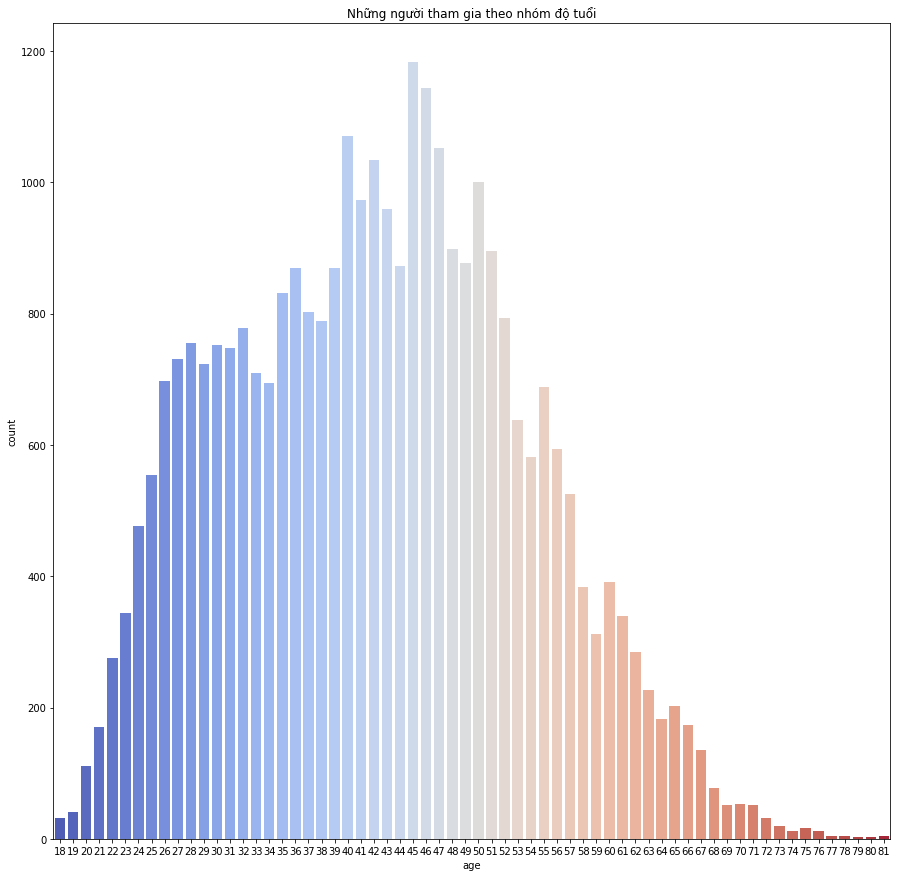

In [33]:
g = sns.countplot('age', data=data, palette="coolwarm")
g.figure.set_size_inches(15,15)
g.set_title("Những người tham gia theo nhóm độ tuổi")

Trung bình độ tuổi tham gia chạy bộ là 42

Text(0.5, 1.0, 'Những người tham gia theo độ tuổi và giới tính')

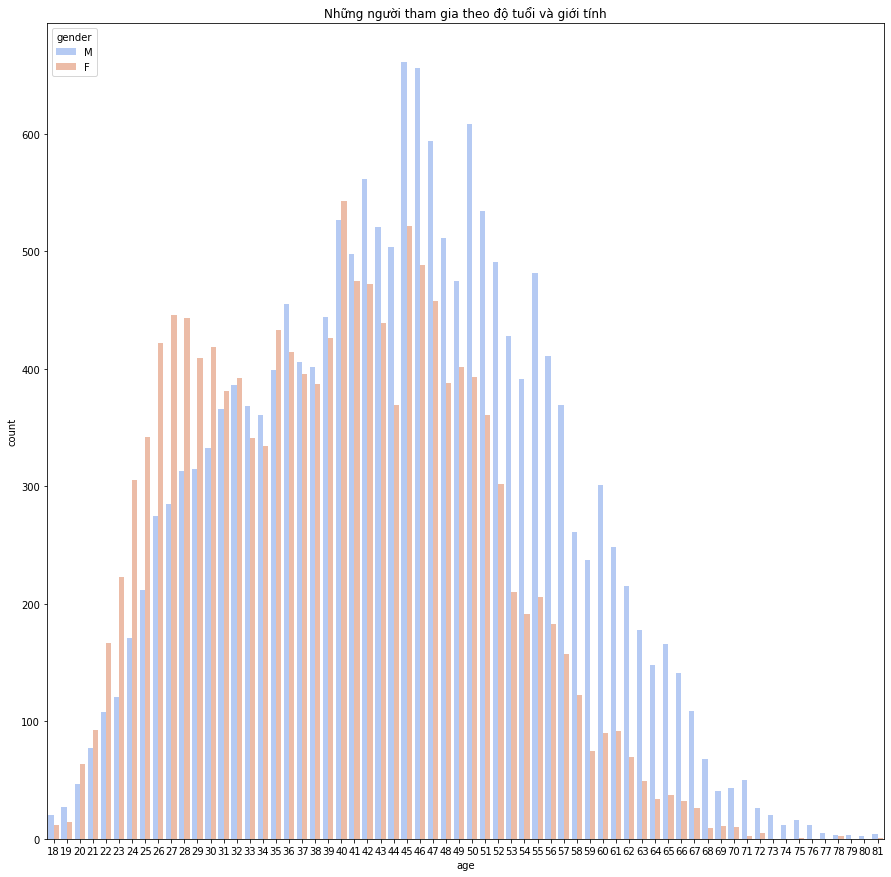

In [34]:
g = sns.countplot('age', data=data, palette="coolwarm", hue='gender')
g.figure.set_size_inches(15,15)
g.set_title("Những người tham gia theo độ tuổi và giới tính")

Biểu đồ cho thấy số lượng người tham gia là nữ cao hơn nam ở nhóm tuổi từ 21 đến 39, ở nhóm 39 trở về đi thì số lượng nam giới tham gia nhiều hơn.

Text(0.5, 1, 'Những người tham gia theo thứ hạng cuối cùng, độ tuổi và giới tính')

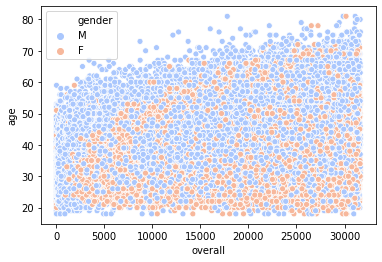

In [44]:
ax = sns.scatterplot(x='overall', y='age', data=data, palette="coolwarm", hue='gender')
g.figure.set_size_inches(15,15)
g.set_title("Những người tham gia theo thứ hạng cuối cùng, độ tuổi và giới tính")

Những người đạt thứ hạng cao, chủ yếu là nam và từ 20 đến 50 tuổi

# III. Clustering

Liệu những vận động viên có thành tích cao có chiến thuật nào không hay cứ cắm mặt vào chạy? Ý tưởng:
- Tính vận tốc từng chặng (ví dụ 5k đến 10k, 20k- 30k,...) 
- Encode overall về 3 nhóm (top 1%, top 10%, còn lại)
- Vẽ biểu đồ scatter xem

In [19]:
# đường chạy boston dài 42.195 km (wikipedia). Vận tốc km/phút
data['vt_0_10k'] = 10/(data['10k']) # 0-10k
data['vt_10_25k'] = 15/(data['25k'] - data['10k']) # 10- 25k
data['vt_25_40k'] = 15/(data['40k'] - data['25k']) # 25 - 40k
data['vt_last'] = (42.2-40)/(data['official'] - data['40k']) #40k - final

In [28]:
data.head()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,...,age,country,city,division,genderdiv,vt_0_10k,vt_10_25k,vt_25_40k,vt_last,overall_encode
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,3.27,85.25,...,47,JPN,Fukuoka,8,8,0.575705,0.495050,0.457875,0.456432,0
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,5.30,138.95,...,33,KEN,Eldoret,1,1,0.306937,0.300903,0.301993,0.321168,0
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,3.08,80.60,...,41,RSA,Paarl,1,1,0.601685,0.514051,0.495050,0.488889,0
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,5.37,140.58,...,24,ETH,Shoa,3,3,0.307031,0.300842,0.296912,0.288336,0
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,3.10,81.23,...,40,JPN,Nogata Fukuoka,2,2,0.584112,0.512821,0.494234,0.487805,0


In [21]:
data['overall_encode'] = np.where(data.overall <= 300,0,np.where(data.overall <= 3200,1,2))

[Text(0, 0.5, 'Độ tuổi'), Text(0.5, 0, '')]

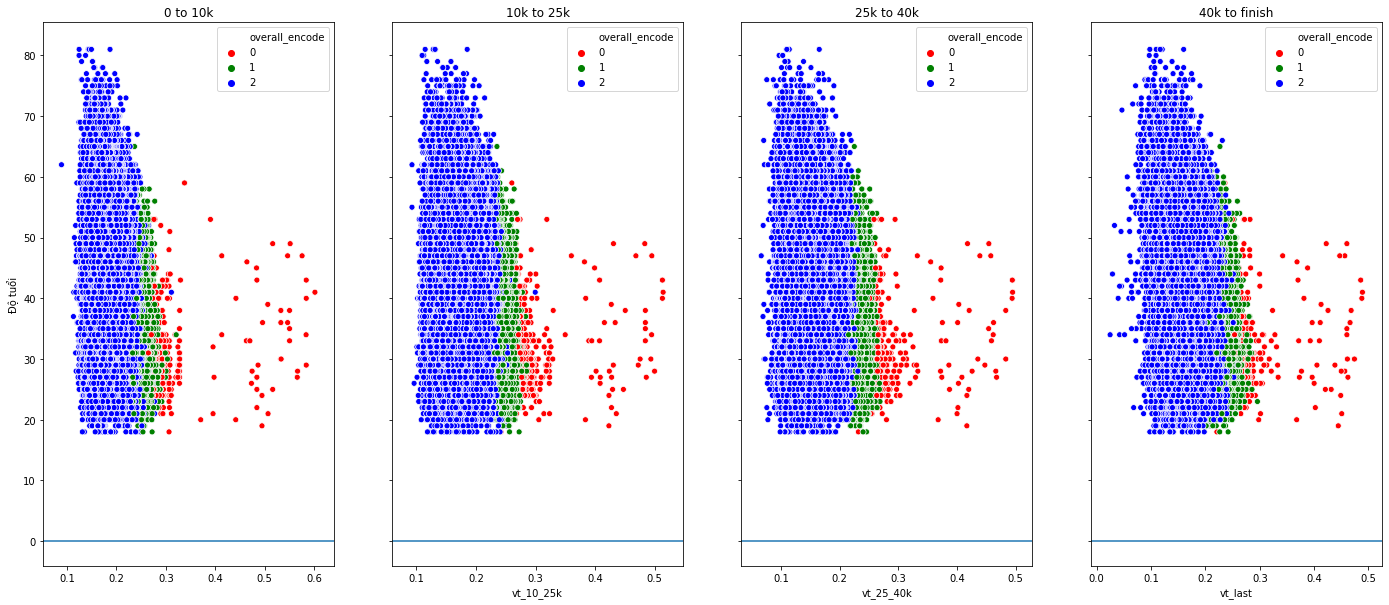

In [27]:
f,(ax,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize = (24,10), sharey=True)
sns.scatterplot(ax=ax,x='vt_0_10k',y='age',data=data,hue='overall_encode',palette=['red','green','blue'])
sns.scatterplot(ax=ax2,x='vt_10_25k',y='age',data=data,hue='overall_encode',palette=['red','green','blue'])
sns.scatterplot(ax=ax3,x='vt_25_40k',y='age',data=data,hue='overall_encode',palette=['red','green','blue'])
sns.scatterplot(ax=ax4,x='vt_last',y='age',data=data,hue='overall_encode',palette=['red','green','blue'])

ax.set_title('0 to 10k')
ax.axhline(y=0)
ax2.set_title('10k to 25k')
ax2.axhline(y=0)
ax3.set_title('25k to 40k')
ax3.axhline(y=0)
ax4.set_title('40k to finish')
ax4.axhline(y=0)
ax.set(ylabel='Độ tuổi',xlabel='')

Nhận xét:
- Sau khi xem xét thì những người ở **1%** top đầu (300 người). Họ không hề có chiến thuật gì bất ngờ. Ở trong 4 biểu đồ đều thể hiện tốc độ của họ đều cao hơn 2 nhóm còn lại (trên 3200 và từ 300 đến 3200). Vậy người nào không đủ sức thì ở trong quãng nào tốc độ cũng chậm
- Những người có tuổi tác cao thì thứ hạng có được cũng thấp hơn. Nếu bạn ở độ tuổi từ 20 đến 40 thì khả năng cạnh tranh của bạn cao hơn những nhóm tuổi còn lại
- Có một số người ở nhóm 1 và 2 chạy nhanh hơn nhóm top 1% (nhóm 0) ở các quãng đầu. Nhưng không thể lọt vào top cao vì thực lực không cho phép

## Build model

In [18]:
data.head()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,gender,overall,age,country,city,division,genderdiv
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,3.27,85.25,M,8,47,JPN,Fukuoka,8,8
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,5.30,138.95,F,21,33,KEN,Eldoret,1,1
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,3.08,80.60,M,1,41,RSA,Paarl,1,1
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,5.37,140.58,F,27,24,ETH,Shoa,3,3
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,3.10,81.23,M,2,40,JPN,Nogata Fukuoka,2,2


In [19]:
from sklearn.cluster import KMeans
%matplotlib inline

One hot encode các feature category, nối vào dữ liệu

In [20]:
n= data[['gender', 'country', 'city']]
# Encode cái feature category
onehot = pd.get_dummies(data=n, columns=['gender', 'country', 'city'])
new_data = pd.concat([data, onehot], axis=1, sort=False)
new_data = new_data.drop(columns=['gender', 'country', 'city'])

Tạo ra 4 cụm từ dữ liệu mới

In [23]:
Kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)
Kmean.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Trung tâm cụm**

In [24]:
Kmean.cluster_centers_

array([[2.11499950e+01, 4.22424427e+01, 8.48880018e+01, ...,
        2.53432258e-18, 1.25203456e-04, 2.53432258e-18],
       [3.08076655e+01, 6.24981417e+01, 1.30069124e+02, ...,
        2.52077005e-18, 2.52077005e-18, 1.29769011e-04],
       [2.67090511e+01, 5.35812198e+01, 1.08874259e+02, ...,
        2.52754631e-18, 2.52754631e-18, 2.52754631e-18],
       [2.40987625e+01, 4.82736330e+01, 9.75017928e+01, ...,
        1.24501992e-04, 2.54109884e-18, 2.54109884e-18]])